<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h2>Supervised Learning Classification Model Development</h2>
<h4>Machine Learning</h4>
Francisco Rodrigo Alonso Castellanos - MBAN <br>
Hult International Business School<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


Import the following packages:

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import numpy as np                                    # mathematical essentials
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from tabulate import tabulate                           #table


# loading data
file = "./GOT_character_predictions.xlsx"


df=pd.read_excel(io=file)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
df.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


-Change the name of a colum <br>
-Imputing missing values

In [2]:
#Change column's name
df = df.rename(columns={'S.No':'N'})
df.head(n = 5)

,N,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [3]:
#Imputing missing values with median of age and dateOfbirht

age_med = df ['age'].median()
df['age'].fillna(value = age_med,
                      inplace = True)

dateOfBirth_med = df ['dateOfBirth'].median()
df['dateOfBirth'].fillna(value = dateOfBirth_med,
                      inplace = True)

In [4]:
#New column from two variables to one
df ['age_birth'] = df['age']+df['dateOfBirth']

In [5]:
#Delete two variables
df= df.drop(['age', 'dateOfBirth'],  axis=1)
df.head(5)

,N,name,title,culture,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,numDeadRelations,popularity,isAlive,age_birth
0,1,Viserys II Targaryen,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,11,0.605351,0,295.0
1,2,Walder Frey,Lord of the Crossing,Rivermen,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,1,0.896321,1,305.0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,0,0.267559,1,295.0
3,4,Aemma Arryn,Queen,NaN,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,0,0.183946,0,105.0
4,5,Sylva Santagar,Greenstone,Dornish,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,0,0.043478,1,305.0


In [6]:
#Imputing missing values
df['title'].fillna('notitle',inplace=True)
df['culture'].fillna('noculture',inplace=True)
df['mother'].fillna('nonmother',inplace=True)
df['father'].fillna('nonfather',inplace=True)
df['heir'].fillna('0',inplace=True)
df['house'].fillna('nonhouse',inplace=True)
df['spouse'].fillna('0',inplace=True)
df['isAliveMother'].fillna('0',inplace=True)
df['isAliveFather'].fillna('0',inplace=True)
df['isAliveHeir'].fillna('0',inplace=True)
df['isAliveSpouse'].fillna('0',inplace=True)

-Converting data type as int 

In [7]:
#Converting data type
df['isAliveMother'] = df['isAliveMother'].astype(int)
df['isAliveFather'] = df['isAliveFather'].astype(int)
df['isAliveHeir'] = df['isAliveHeir'].astype(int)
df['isAliveSpouse'] = df['isAliveSpouse'].astype(int)
df['age_birth'] = df['age_birth'].astype(int)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Preparing Explanatory and Response Data <br>
Declare the explanatory variables as <strong>df_data</strong> and the response variable (isAlive) as <strong>df_target</strong>.

In [8]:
# declaring explanatory variables
df_data = df.drop('isAlive', axis = 1)

 
# declaring response variable
df_target = df.loc[ : , 'isAlive']

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Prepare train-test split for statsmodels.<br>
    
Notice the new stratify argument. This helps preserve the balance of the response variable on in the training and testing sets.

In [9]:
# train-test split with stratification
X_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = df_target) # preserving balance


# merging training data for statsmodels
df_train = pd.concat([X_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Build a Univariate Logistic Regression Model <br>

Build a logistic regression model in statsmodels using the explanatory variable that is most highly correlated with the response variable.

In [10]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive ~ N +  
                                             age_birth + 
                                             book1_A_Game_Of_Thrones + 
                                             book2_A_Clash_Of_Kings + 
                                             book3_A_Storm_Of_Swords + 
                                             book4_A_Feast_For_Crows + 
                                             book5_A_Dance_with_Dragons + 
                                             isAliveMother + 
                                             isAliveFather + 
                                             isAliveHeir + 
                                             isAliveSpouse + 
                                             isMarried + 
                                             isNoble + 
                                             numDeadRelations + 
                                             popularity """,
                                             data    = df_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full. summary2()

Optimization terminated successfully.
         Current function value: 0.424727
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.251     
Dependent Variable:     isAlive              AIC:                  1519.3923 
Date:                   2021-12-05 19:49     BIC:                  1606.8793 
No. Observations:       1751                 Log-Likelihood:       -743.70   
Df Model:               15                   LL-Null:              -992.53   
Df Residuals:           1735                 LLR p-value:          1.7533e-96
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                  -60.0081   8.0068 -7.4946 0.0000 -75.7012 -44.3150
N                           -0.0008   0.0001 -5.8825 0.0000  -0.0011  -0.0006
age_birth                    0.2091   0.0272  7.6964 0.0000   0.1559   0.2623
book1_A_Game_Of_Thrones     -0.5167   0.1671 -3.0928 0.0020  -0.8441  -0.1892
book2_A_Clash_Of_Kings      -0.6031   0.1490 -4.0490 0.0001  -0.8951  -0.3112
book3_A_Storm_Of_Swords     -0.3916   0.1569 -2.4965 0.0125  -0.6990  -0.0842
book4_A_Feast_For_Crows      1.5108   0.1670  9.0487 0.0000   1.1836   1.8381
book5_A_Dance_with_Dragons   0.0581   0.1571  0.3700 0.7114  -0.2498   0.3660
isAliveMother               -1.3656   0.9050 -1.5089 0.1313  -3.1393   0.4082
isAliveFather                0.6045   1.2572  0.4808 0.6307  -1.8596   3.0686
isAliveHeir                 -0.4172   0.7652 -0.5452 0.5856  -1.9170   1.0826
isAliveSpouse                0.1608   0.4881  0.3294 0.7418  -0.7958   1.1174
isMarried                    0.1603   0.4449  0.3603 0.7186  -0.7118   1.0324
isNoble                      0.2380   0.1384  1.7189 0.0856  -0.0334   0.5093
numDeadRelations            -0.1010   0.0629 -1.6064 0.1082  -0.2242   0.0222
popularity                  -1.6276   0.6033 -2.6980 0.0070  -2.8099  -0.4452
=============================================================================

"""

In [11]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~  N +  
                                             age_birth + 
                                             book1_A_Game_Of_Thrones + 
                                             book2_A_Clash_Of_Kings + 
                                             book3_A_Storm_Of_Swords + 
                                             book4_A_Feast_For_Crows + 
                                             isAliveMother + 
                                             isNoble + 
                                             numDeadRelations + 
                                             popularity  """,
                                        data    = df_train)


# fitting the model object
results_full = logit_sig.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.425449
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                  Logit              Pseudo R-squared:   0.249      
Dependent Variable:     isAlive            AIC:                1511.9232  
Date:                   2021-12-05 19:49   BIC:                1572.0705  
No. Observations:       1751               Log-Likelihood:     -744.96    
Df Model:               10                 LL-Null:            -992.53    
Df Residuals:           1740               LLR p-value:        4.8117e-100
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         10.0000                                           
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -60.6169   8.0167 -7.5613 0.0000 -76.3293 -44.9044
N                        -0.0008   0.0001 -5.8760 0.0000  -0.0011  -0.0005
age_birth                 0.2111   0.0272  7.7569 0.0000   0.1578   0.2645
book1_A_Game_Of_Thrones  -0.5153   0.1644 -3.1336 0.0017  -0.8376  -0.1930
book2_A_Clash_Of_Kings   -0.5822   0.1482 -3.9294 0.0001  -0.8726  -0.2918
book3_A_Storm_Of_Swords  -0.3869   0.1568 -2.4677 0.0136  -0.6942  -0.0796
book4_A_Feast_For_Crows   1.5464   0.1602  9.6515 0.0000   1.2324   1.8604
isAliveMother            -1.3925   0.8465 -1.6450 0.1000  -3.0516   0.2666
isNoble                   0.2565   0.1370  1.8720 0.0612  -0.0121   0.5251
numDeadRelations         -0.1041   0.0619 -1.6819 0.0926  -0.2254   0.0172
popularity               -1.5593   0.5584 -2.7924 0.0052  -2.6538  -0.4648
==========================================================================

"""

In [12]:
# instantiating a logistic regression model object
logit_full = smf.logit(formula = """ isAlive ~ age_birth + 
                                              popularity + 
                                            book1_A_Game_Of_Thrones +
                                             book4_A_Feast_For_Crows""",
                                    data    = df_train)


# fitting the model object
logit_full = logit_full.fit()


# checking the results SUMMARY
logit_full.summary2()

Optimization terminated successfully.
         Current function value: 0.447966
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.210     
Dependent Variable:    isAlive             AIC:                 1578.7783 
Date:                  2021-12-05 19:49    BIC:                 1606.1180 
No. Observations:      1751                Log-Likelihood:      -784.39   
Df Model:              4                   LL-Null:             -992.53   
Df Residuals:          1746                LLR p-value:         8.3999e-89
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -56.6546   7.8897 -7.1808 0.0000 -72.1181 -41.1910
age_birth                 0.1953   0.0268  7.2946 0.0000   0.1428   0.2477
popularity               -2.9307   0.4044 -7.2469 0.0000  -3.7233  -2.1381
book1_A_Game_Of_Thrones  -0.8967   0.1532 -5.8528 0.0000  -1.1970  -0.5964
book4_A_Feast_For_Crows   1.1058   0.1310  8.4414 0.0000   0.8491   1.3626
==========================================================================

"""

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Logistic Regression in scikit-learn</h2><br>
We can use the modeling efforts above as candidate models. In an effort to stay organized, we can put each candidate model into a dictionary. Run the code below to produce a dictionary of each candidate model's explanatory variables.

In [13]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['N','age_birth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                   'isAliveMother','isAliveFather','isAliveHeir','isAliveSpouse',
                   'isMarried','isNoble','numDeadRelations','popularity' ],
 

 # significant variables only (set 1)
 'logit_sig'    : [ 'N','age_birth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows', 'isAliveMother',
                   'isNoble','numDeadRelations','popularity'],
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['age_birth','book4_A_Feast_For_Crows','popularity', 'book1_A_Game_Of_Thrones']

}

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


Build a logistic regression model in scikit-learn<br>
Build a logistic regression model in scikit-learn using the <strong>logit_sig</strong> explanatory variables and <strong>isAlive</strong> as the response variable.

In [14]:
# train/test split with the full model
df_data   =  df.loc[ : , candidate_dict['logit_sig_2']]
df_target =  df.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            df_data,
            df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = df_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 3,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.8161
LogReg Testing  ACCURACY: 0.8564
LogReg Train-Test Gap   : 0.0403


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Visualized confusion matrix

In [15]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 3
True Positives : 142



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Area Under The Curve (AUC)

In [4]:
# area under the roc curve (auc)
print('Logistic AUC Score:',roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

NameError: name 'roc_auc_score' is not defined

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>


In [17]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = 0.10,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

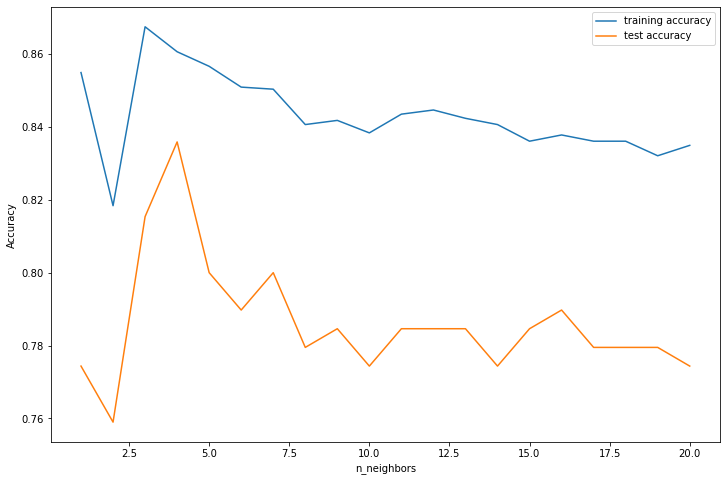

The optimal number of neighbors is: 4


In [18]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = df_data,
                                  y_data        = df_target,
                                  response_type = 'class')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
K-Nearest Neighbors and Distance Standardization

In [19]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(df_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(df_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = df_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('KNN AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8104
Testing  ACCURACY: 0.7846
KNN AUC Score        : 0.7634


In [20]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 36
False Positives: 14
False Negatives: 28
True Positives : 117



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Classification Trees (CART Models)

In [21]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.8784
Full Tree Testing ACCURACY : 0.8821
Full Tree AUC Score: 0.8159


In [22]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 7
True Positives : 138



In [23]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.8429
Testing  ACCURACY: 0.9077
AUC Score        : 0.8528


In [24]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 37
False Positives: 13
False Negatives: 5
True Positives : 140



Logistic Regression with Default Hyperparameters

In [25]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = LogisticRegression(C            = 0.1,
                              warm_start   = True,
                              solver       = 'newton-cg',
                              max_iter     = 1000,
                              random_state = 219)


# FITTING the model to the full dataset
lr_tuned.fit(df_data, df_target) # this is ok because already tuned


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.791
LR Tuned Testing  ACCURACY: 0.8462
LR Tuned AUC Score        : 0.7262


In [26]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 24
False Positives: 26
False Negatives: 4
True Positives : 141



 <hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Hyperparameter Tuning on Classification Trees

In [27]:

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(splitter         = 'best',
                                    min_samples_leaf = 4,
                                    max_depth        = 8,
                                    criterion        = 'entropy',
                                    random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_fit = tree_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                       y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.8549
Testing  ACCURACY: 0.9231
AUC Score        : 0.8631


In [28]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 37
False Positives: 13
False Negatives: 2
True Positives : 143



 <hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
    Random Forest

In [29]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [30]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))
print('R_F_AUC_Score:',  roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))


# saving scoring data for future use
R_F_training = rf_default_fit.score(x_train, y_train).round(4)
R_F_testing = rf_default_fit.score(x_test, y_test).round(4)
R_F_AUC_Score = roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4)



Training ACCURACY: 0.8555
Testing  ACCURACY: 0.9026
R_F_AUC_Score: 0.8231


In [31]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 2
True Positives : 143



Logistic Regression with Default Hyperparameters

In [7]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 1,
                                      n_estimators     = 100,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

NameError: name 'RandomForestClassifier' is not defined

In [33]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 40
False Positives: 10
False Negatives: 4
True Positives : 141



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Gradient Boosted Machines

In [34]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)



#saving scoring data for future use
GBM_FULL_training = full_gbm_default_fit.score(x_train, y_train).round(4)
GBM_FULL_testing  = full_gbm_default_fit.score(x_test, y_test).round(4)
GBM_FULL = roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8784
Testing ACCURACY : 0.8974
AUC Score        : 0.8328


In [35]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 5
True Positives : 140



Gradient Boosting  Classifier

In [36]:
# INSTANTIATING with best_estimator
gbm_tuned = GradientBoostingClassifier(learning_rate = 0.6,
                                       max_depth     = 4,
                                       n_estimators  = 325,
                                       warm_start    = True,
                                       random_state  = 219)


# FITTING to the FULL DATASET (due to cross-validation)
gbm_tuned_fit = gbm_tuned.fit(df_data, df_target)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


#saving scoring data for future use
GMB_Tuned_training = gbm_tuned_fit.score(x_train, y_train).round(4)
GMB_Tuned_testing =  gbm_tuned_fit.score(x_test, y_test).round(4)
GMB_Tuned =  roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.8761
Testing  ACCURACY: 0.9385
AUC Score        : 0.8866


In [37]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 39
False Positives: 11
False Negatives: 1
True Positives : 144



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Checking the results of the all models!

In [38]:
info = {'Model': ['Logistic','Knn Tree' ,'Full Tree','Pruned Tree','LR Tuned',
                  'Random Forest','Random Forest Tuned','GBM','GBM Tuned','Tree Tuned (Final Model)'
                  ], 
        'Training Accuracy':[logreg_train_score,knn_train_score,full_tree_train_score, pruned_tree_train_score,
                            lr_tuned_train_score, R_F_training,forest_tuned_train_score, GBM_FULL_training,
                            GMB_Tuned_training,tree_tuned_train_score],
        'Testing Accuracy':[logreg_test_score, knn_test_score,full_tree_test_score, pruned_tree_test_score, 
                           lr_tuned_test_score, R_F_testing,forest_tuned_test_score,GBM_FULL_testing,
                            GMB_Tuned_testing, tree_tuned_test_score],
        'AUC Score':[logreg_auc_score, knn_auc_score,full_tree_auc_score, pruned_tree_auc_score,
                    lr_tuned_auc, R_F_AUC_Score, forest_tuned_auc, GBM_FULL, GMB_Tuned,tree_tuned_auc,],
        'Confussion Matrix':[(logreg_tn, logreg_fp, logreg_fn, logreg_tp), 
                             (knn_tree_tn,knn_tree_fp,knn_tree_fn,knn_tree_tp),
                            (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                            (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                            (lr_tuned_tn,lr_tuned_fp,lr_tuned_fn, lr_tuned_tp),
                            (rf_tn, rf_fp, rf_fn, rf_tp),
                             (tuned_rf_tn, tuned_rf_fp, tuned_rf_fn, tuned_rf_tp),
                             (gbm_default_tn, gbm_default_fp, gbm_default_fn,gbm_default_tp),
                             (gbm_tuned_tn,gbm_tuned_fp,gbm_tuned_fn,gbm_tuned_tp),
                             (tuned_tree_tn, tuned_tree_fp, tuned_tree_fn, tuned_tree_tp)
                            
                            ]
}

print(tabulate(info, headers='keys',  tablefmt='fancy_grid'))

╒══════════════════════════╤═════════════════════╤════════════════════╤═════════════╤═════════════════════╕
│ Model                    │   Training Accuracy │   Testing Accuracy │   AUC Score │ Confussion Matrix   │
╞══════════════════════════╪═════════════════════╪════════════════════╪═════════════╪═════════════════════╡
│ Logistic                 │              0.8161 │             0.8564 │      0.7397 │ (25, 25, 3, 142)    │
├──────────────────────────┼─────────────────────┼────────────────────┼─────────────┼─────────────────────┤
│ Knn Tree                 │              0.8104 │             0.7846 │      0.7634 │ (36, 14, 28, 117)   │
├──────────────────────────┼─────────────────────┼────────────────────┼─────────────┼─────────────────────┤
│ Full Tree                │              0.8784 │             0.8821 │      0.8159 │ (34, 16, 7, 138)    │
├──────────────────────────┼─────────────────────┼────────────────────┼─────────────┼─────────────────────┤
│ Pruned Tree              │